<a href="https://colab.research.google.com/github/ismail61/ML_Lab/blob/master/lab_final/AI_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 02 (For AI Lab):

In [2]:
#Importing the libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
data_path = '/content/gdrive/MyDrive/Dataset/bank-data/bank-full.csv'

In [5]:
df = pd.read_csv(data_path, header=0, delimiter=';')

In [14]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Hence, 'y' is the target variable.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.shape

(45211, 17)

## Data Exploration

In [19]:
#Printing the first 5 rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

<AxesSubplot:>

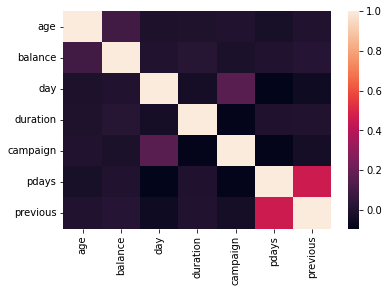

In [9]:
sns.heatmap(df.corr())

In [20]:
#checking for missing values in dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df['marital'] = df['marital'].map({ 'married':0, 'single':1, 'divorced':2 })
df['education'] = df['education'].map({ 'tertiary':0, 'secondary':1, 'primary':2, 'unknown':3 })
df['default'] = df['default'].map({ 'yes':0, 'no':1 })
df['housing'] = df['housing'].map({ 'yes':0, 'no':1 })
df['loan'] = df['loan'].map({ 'yes':0, 'no':1 })
df['contact'] = df['contact'].map({ 'telephone':0, 'cellular':1, 'unknown':2 })
df['poutcome'] = df['poutcome'].map({ 'success':0, 'other':1, 'unknown':2, 'failure':3 })
df['job'] = df['job'].map({ 'management':0, 'entrepreneur':1, 'technician':2, 'blue-collar':3, 'unknown':4, 'retired':5, 'admin.':6, 'services':7, 
                           'self-employed':8, 'unemployed':9, 'housemaid':10, 'student':11 })
df['month']=df['month'].map({ 'jan':0, 'feb':2, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11 })
df['y'] = df['y'].map({ 'yes':0, 'no':1 })

In [11]:
df['marital']

0        0
1        1
2        0
3        0
4        1
        ..
45206    0
45207    2
45208    0
45209    0
45210    0
Name: marital, Length: 45211, dtype: int64

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,1,2143,0,1,2,5,4,261,1,-1,0,2,1
1,44,2,1,1,1,29,0,1,2,5,4,151,1,-1,0,2,1
2,33,1,0,1,1,2,0,0,2,5,4,76,1,-1,0,2,1
3,47,3,0,3,1,1506,0,1,2,5,4,92,1,-1,0,2,1
4,33,4,1,3,1,1,1,1,2,5,4,198,1,-1,0,2,1


<AxesSubplot:xlabel='y', ylabel='count'>

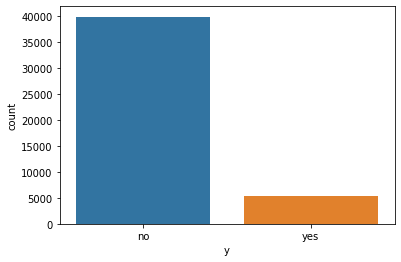

In [23]:
# Plotting the 'y' frequency
sns.countplot(data=df, x='y')

<AxesSubplot:>

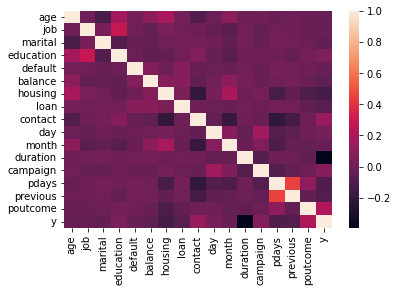

In [13]:
sns.heatmap(df.corr())

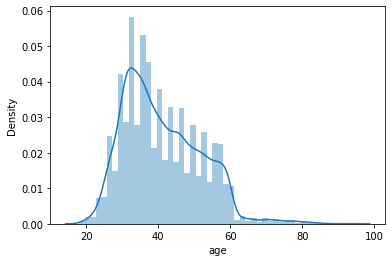

In [24]:
sns.distplot(df['age']);

In [14]:
#Correlation matrix
tc = df.corr()
tc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.005437,-0.126351,0.173615,0.017879,0.097783,0.185513,0.015655,-0.092577,-0.009120,0.096435,-0.004648,0.004760,-0.023758,0.001288,-0.018361,-0.025155
job,-0.005437,1.000000,0.033610,0.285693,0.009510,-0.033154,0.044816,0.013488,-0.003670,-0.024202,-0.062431,0.007355,-0.034049,0.006890,-0.006319,-0.016936,-0.023137
marital,-0.126351,0.033610,1.000000,-0.091853,-0.018404,-0.028172,0.011671,0.018526,0.014290,-0.005217,-0.043744,0.018834,-0.029294,0.020832,0.006876,-0.012726,-0.043846
education,0.173615,0.285693,-0.091853,1.000000,-0.009035,-0.050572,-0.038689,0.004307,0.073425,-0.021661,-0.072516,-0.002554,-0.000194,-0.007092,-0.025295,0.017699,0.051341
default,0.017879,0.009510,-0.018404,-0.009035,1.000000,0.066745,-0.006025,0.077234,-0.024095,-0.009424,-0.014663,0.010021,-0.016822,0.029979,0.018329,-0.005720,-0.022419
balance,0.097783,-0.033154,-0.028172,-0.050572,0.066745,1.000000,0.068768,0.084350,-0.047701,0.004503,0.097967,0.021560,-0.014578,0.003435,0.016674,-0.020035,-0.052838
housing,0.185513,0.044816,0.011671,-0.038689,-0.006025,0.068768,1.000000,0.041323,-0.207722,0.027982,0.187266,-0.005075,0.023599,-0.124178,-0.037076,-0.109437,-0.139173
loan,0.015655,0.013488,0.018526,0.004307,0.077234,0.084350,0.041323,1.000000,0.000058,-0.011370,-0.021593,0.012412,-0.009980,0.022754,0.011043,-0.038411,-0.068185
contact,-0.092577,-0.003670,0.014290,0.073425,-0.024095,-0.047701,-0.207722,0.000058,1.000000,-0.038643,-0.188499,-0.001494,-0.020046,-0.210651,-0.139518,0.002593,0.130590
day,-0.009120,-0.024202,-0.005217,-0.021661,-0.009424,0.004503,0.027982,-0.011370,-0.038643,1.000000,0.077280,-0.030206,0.162490,-0.093044,-0.051710,-0.007424,0.028348


<AxesSubplot:>

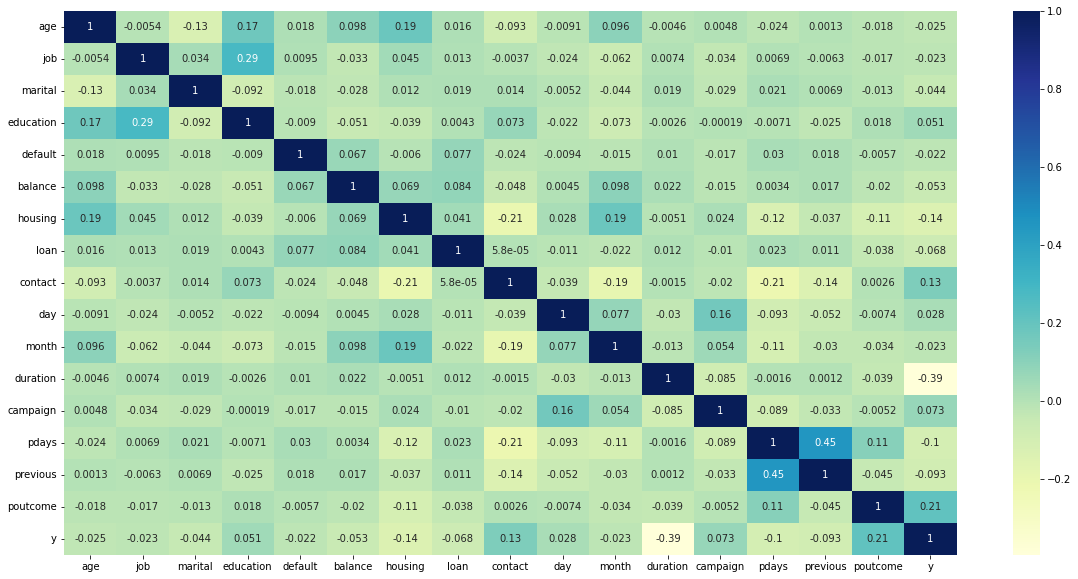

In [15]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
# Separate the target variable from the features
X = df.drop('y', axis=1)
y = df['y']
X.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10411,53,9,0,1,1,0,0,1,2,12,5,313,1,-1,0,2


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()
X_train.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7263,-0.464367,-0.556351,-0.739359,0.074636,0.138111,0.034717,-0.89233,0.438588,1.414988,1.583291,-0.519696,0.7167,-0.565878,-0.411358,-0.244768,0.000831


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [41]:
# Create an SVM object with a rbf kernel
svm = SVC(kernel='rbf', gamma='auto')

# Train the model on the training data
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'degree': [2, 3, 4, 5]
}

In [42]:
# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8793541966161672
